In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("Data/X_output_final.csv")
y = pd.read_csv("Data/y_output_final.csv")

In [3]:
print(X.head())

   D.O. mg/L    pH  Conductivity m mhos/cm  BOD at 27C mg/L  Nitrate mg/L  \
0        7.8  7.50                   482.0              3.0         0.150   
1        5.9  7.77                   521.0              2.7         0.086   
2        6.7  8.00                   670.0              2.0         0.054   
3        7.9  7.46                   540.0              2.0         0.150   
4        6.9  7.47                   558.0              2.0         0.150   

   Nitrite mg/L  Fecal Coliform MPN/100ml  Total Coliform MPN/100ml  \
0         0.150                      14.0                      39.0   
1         0.252                      11.0                      26.0   
2         0.111                      21.0                      94.0   
3         0.150                      21.0                      47.0   
4         0.150                      40.0                     680.0   

   Turbidity NTU  Phenophthaline Alkalinity mg/L  ...  Magnesium as Mg++ mg/L  \
0       6.590048             

In [4]:
print(y.head())

  DBU Class
0         B
1         B
2         B
3         A
4         C


<Axes: >

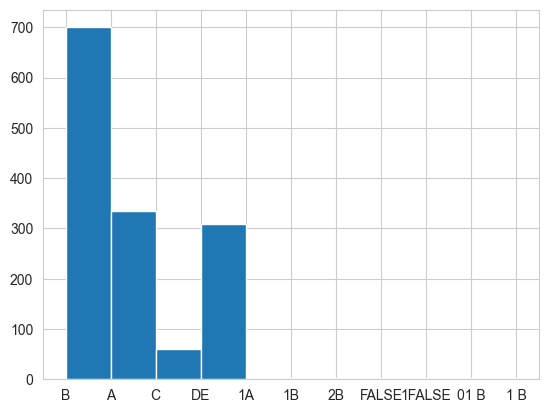

In [5]:
y["DBU Class"].hist()

In [6]:
Xy = pd.concat([X, y], axis=1)
valid_labels = ["A", "B", "C", "DE"]
Xy = Xy[Xy['DBU Class'].isin(valid_labels)]

In [7]:
print(Xy.head())

   D.O. mg/L    pH  Conductivity m mhos/cm  BOD at 27C mg/L  Nitrate mg/L  \
0        7.8  7.50                   482.0              3.0         0.150   
1        5.9  7.77                   521.0              2.7         0.086   
2        6.7  8.00                   670.0              2.0         0.054   
3        7.9  7.46                   540.0              2.0         0.150   
4        6.9  7.47                   558.0              2.0         0.150   

   Nitrite mg/L  Fecal Coliform MPN/100ml  Total Coliform MPN/100ml  \
0         0.150                      14.0                      39.0   
1         0.252                      11.0                      26.0   
2         0.111                      21.0                      94.0   
3         0.150                      21.0                      47.0   
4         0.150                      40.0                     680.0   

   Turbidity NTU  Phenophthaline Alkalinity mg/L  ...  Sulphate mg/L  \
0       6.590048                      

In [8]:
print(len(Xy))

1403


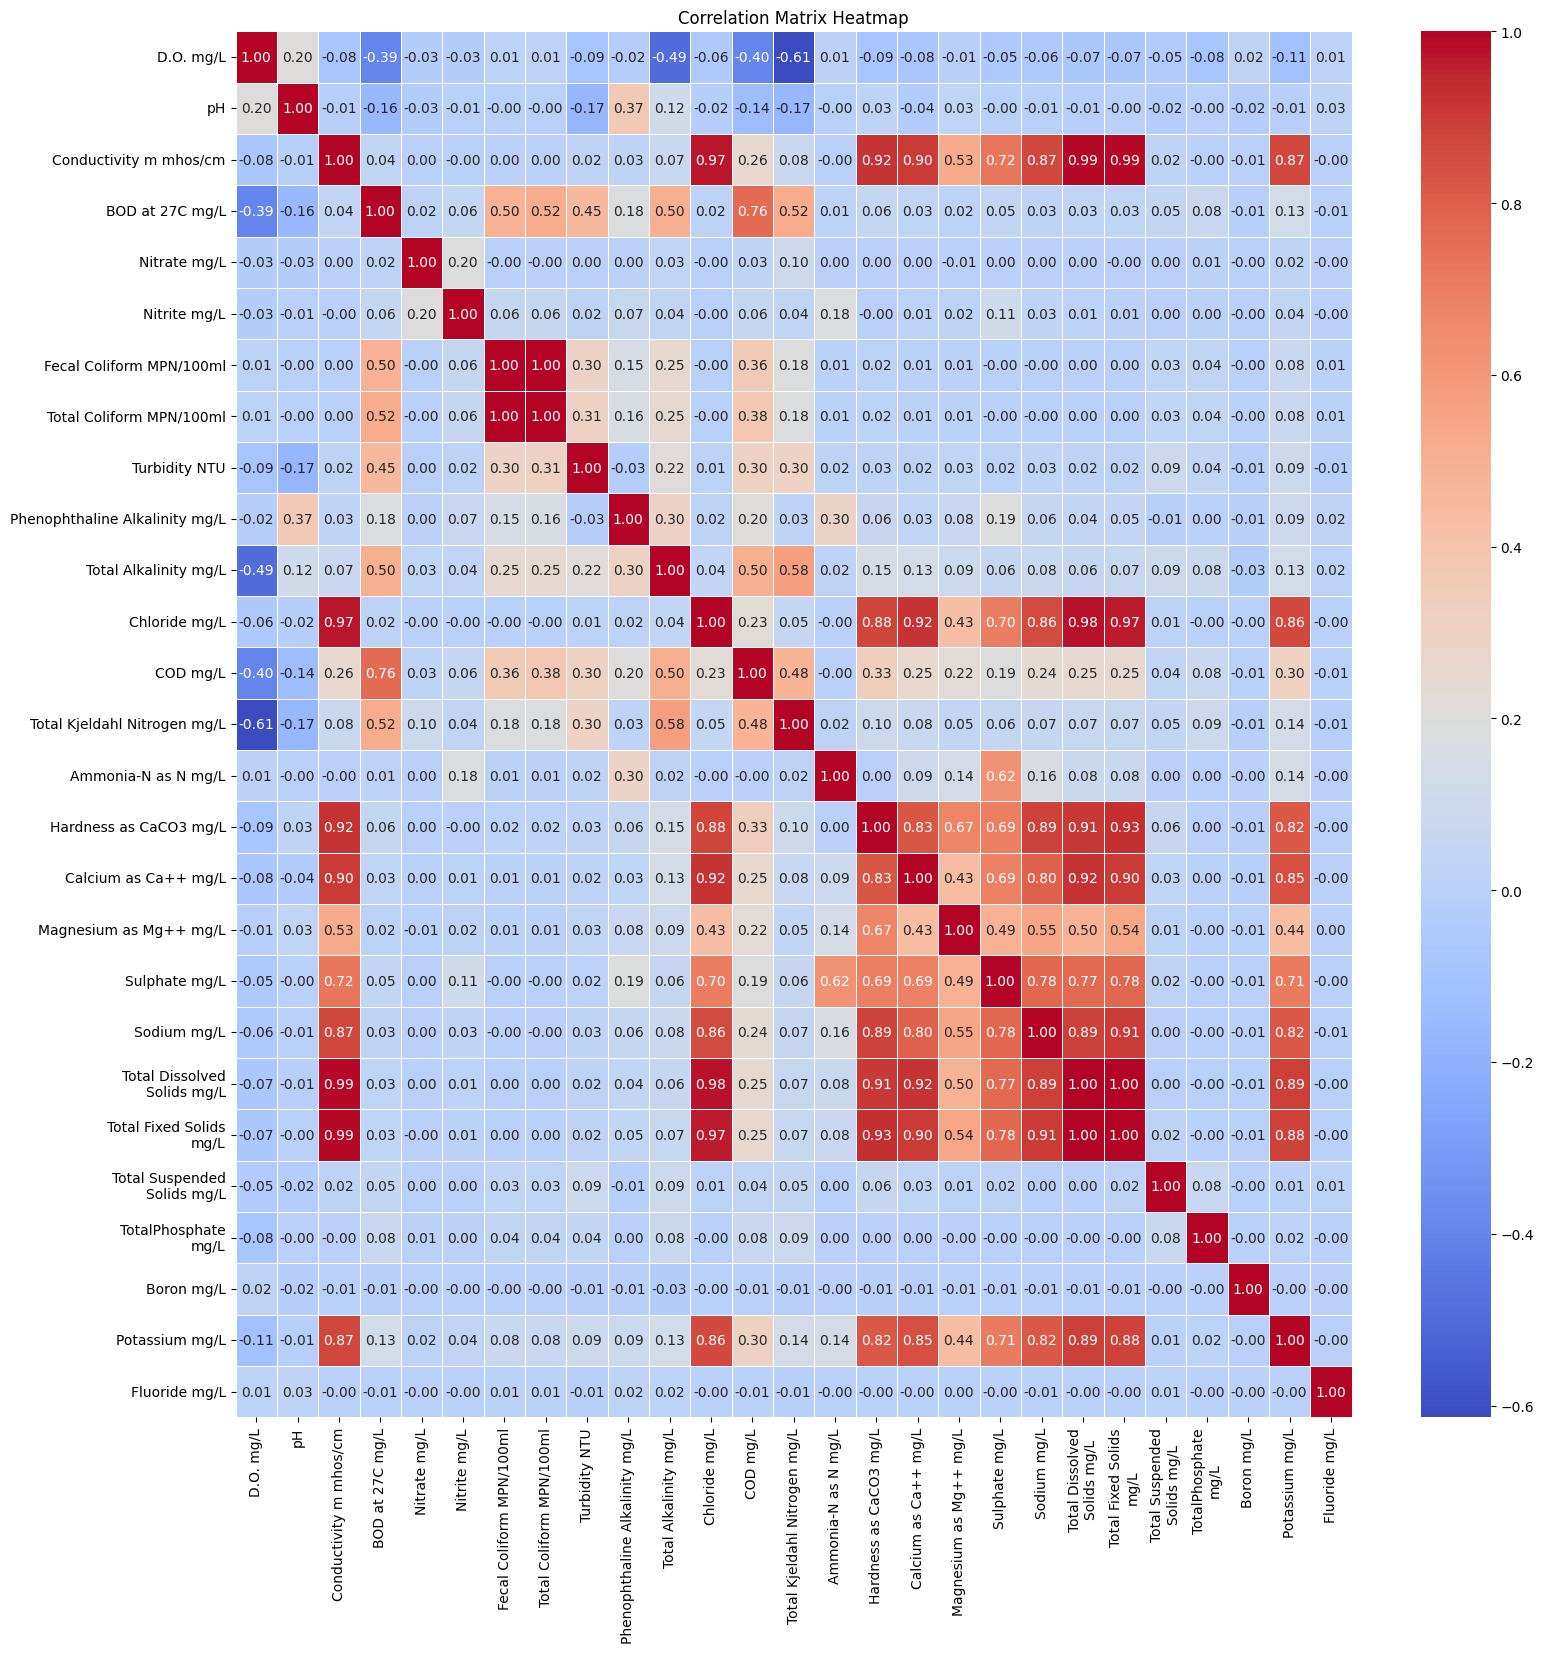

In [9]:
corr_matr = Xy.iloc[:, :-1].corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

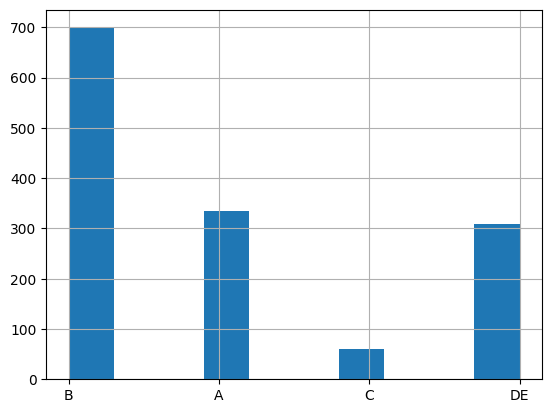

In [10]:
Xy["DBU Class"].hist()

In [11]:
Xy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1403 entries, 0 to 1412
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   D.O. mg/L                       1403 non-null   float64
 1   pH                              1403 non-null   float64
 2   Conductivity m mhos/cm          1403 non-null   float64
 3   BOD at 27C mg/L                 1403 non-null   float64
 4   Nitrate mg/L                    1403 non-null   float64
 5   Nitrite mg/L                    1403 non-null   float64
 6   Fecal Coliform MPN/100ml        1403 non-null   float64
 7   Total Coliform MPN/100ml        1403 non-null   float64
 8   Turbidity NTU                   1403 non-null   float64
 9   Phenophthaline Alkalinity mg/L  1403 non-null   float64
 10  Total Alkalinity mg/L           1403 non-null   float64
 11  Chloride mg/L                   1403 non-null   float64
 12  COD mg/L                        1403 no

In [14]:
#To see relationship between features.
corr_matr = Xy.iloc[:, :-1].corr()
#print(corr_matr)

#Selecting features that are dependant (have string correlation - close to 1)
np.fill_diagonal(corr_matr.values, np.nan)
abs_corr_matr = corr_matr.abs()
min_corr_idx = np.unravel_index(np.nanargmax(abs_corr_matr.values), abs_corr_matr.shape)

# Extract the names of the features with the lowest correlation
feature_1 = abs_corr_matr.columns[min_corr_idx[0]]
feature_2 = abs_corr_matr.columns[min_corr_idx[1]]

correlations = []

for i in range(len(abs_corr_matr.columns)):
    for j in range(i+1, len(abs_corr_matr.columns)):  # j starts from i+1 to avoid duplicates
        feature1 = abs_corr_matr.columns[i]
        feature2 = abs_corr_matr.columns[j]
        corr_value = abs_corr_matr.iloc[i, j]  # Get the correlation value
        correlations.append((feature1, feature2, corr_value))  # Append as tuple (feature1, feature2, correlation score)

correlations_df = pd.DataFrame(correlations, columns=['Feature 1', 'Feature 2', 'Correlation'])
correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)
print(correlations_df.head(20))

                        Feature 1                     Feature 2  Correlation
141      Fecal Coliform MPN/100ml      Total Coliform MPN/100ml     0.997592
330  Total Dissolved\nSolids mg/L      Total Fixed Solids\nmg/L     0.995815
69         Conductivity m mhos/cm      Total Fixed Solids\nmg/L     0.991550
68         Conductivity m mhos/cm  Total Dissolved\nSolids mg/L     0.989066
239                 Chloride mg/L  Total Dissolved\nSolids mg/L     0.979509
59         Conductivity m mhos/cm                 Chloride mg/L     0.970067
240                 Chloride mg/L      Total Fixed Solids\nmg/L     0.967400
290        Hardness as CaCO3 mg/L      Total Fixed Solids\nmg/L     0.926735
299          Calcium as Ca++ mg/L  Total Dissolved\nSolids mg/L     0.923634
63         Conductivity m mhos/cm        Hardness as CaCO3 mg/L     0.921220
235                 Chloride mg/L          Calcium as Ca++ mg/L     0.920948
289        Hardness as CaCO3 mg/L  Total Dissolved\nSolids mg/L     0.906439

In [ ]:
print(correlations_df.head(20))

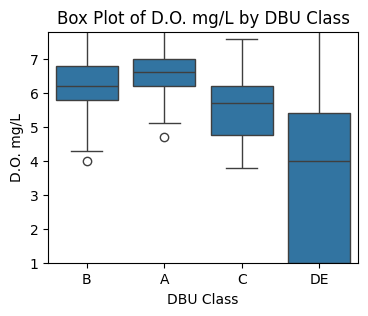

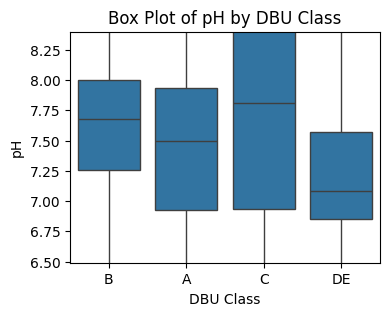

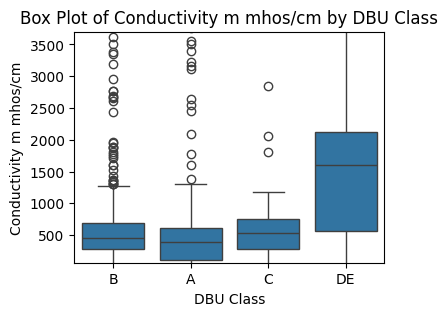

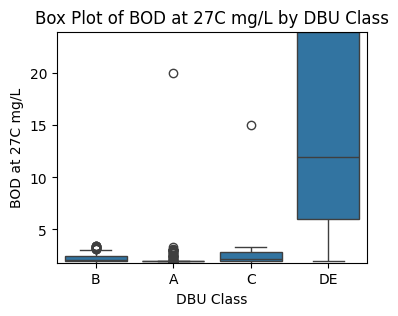

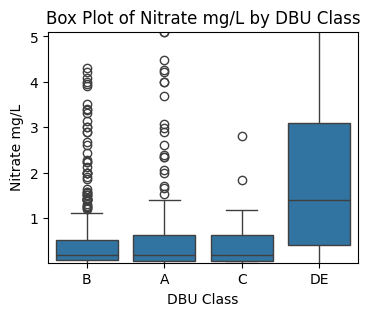

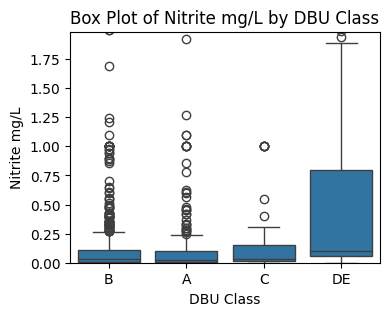

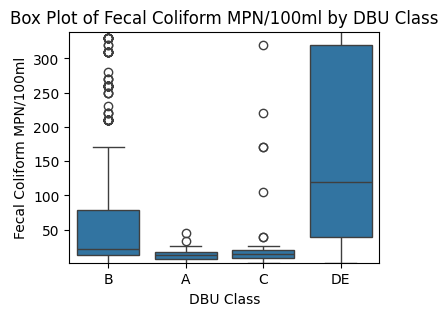

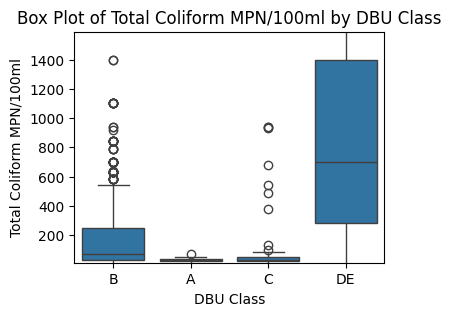

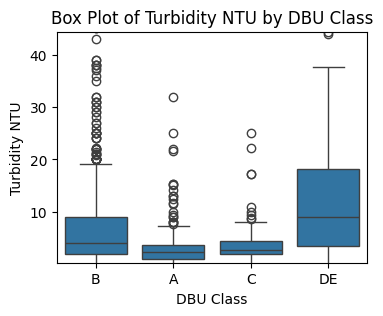

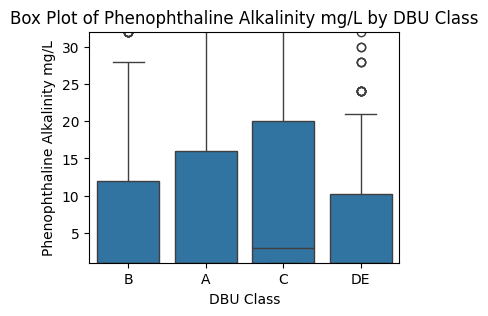

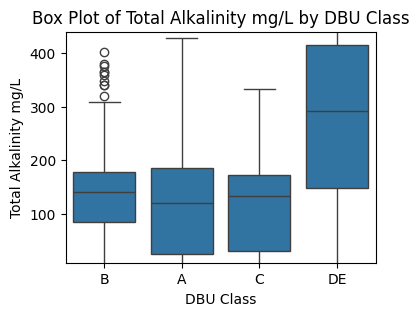

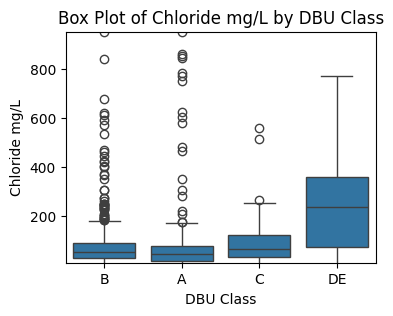

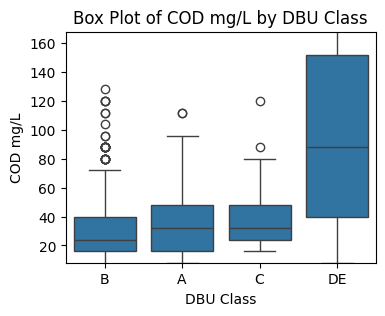

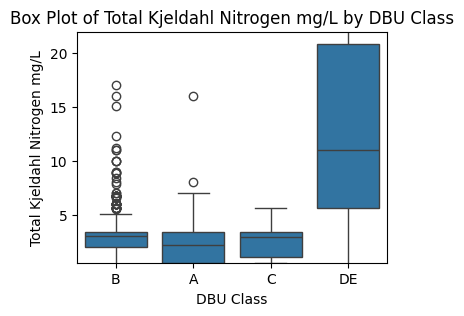

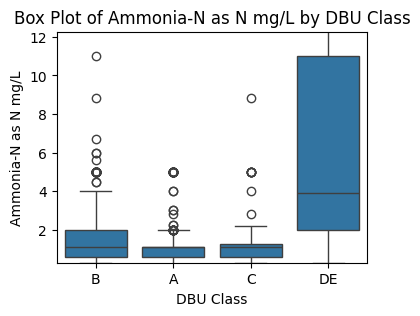

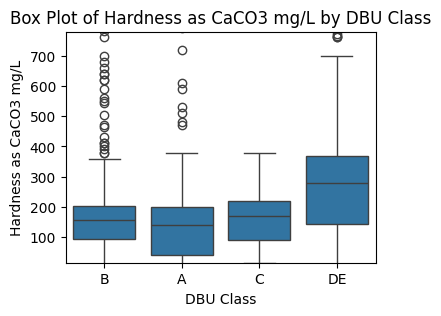

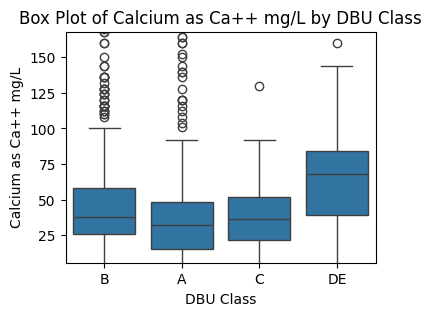

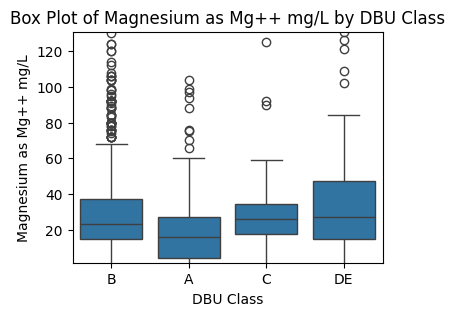

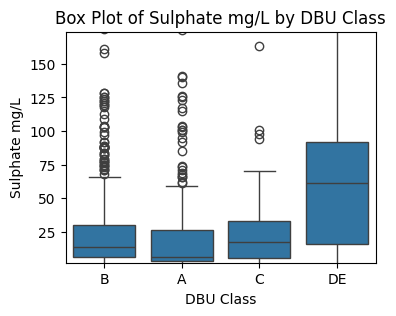

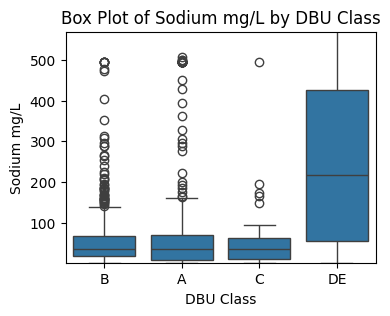

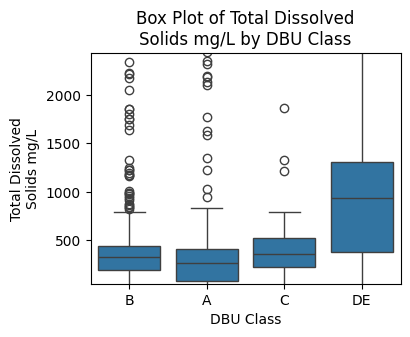

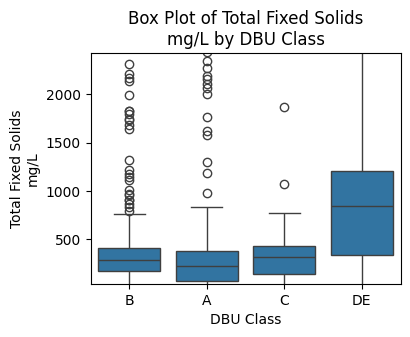

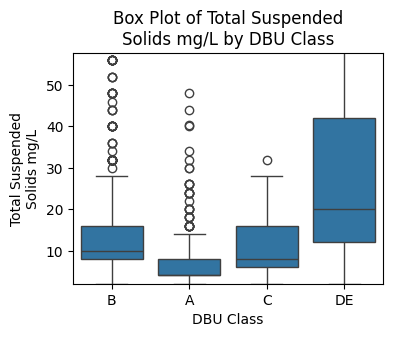

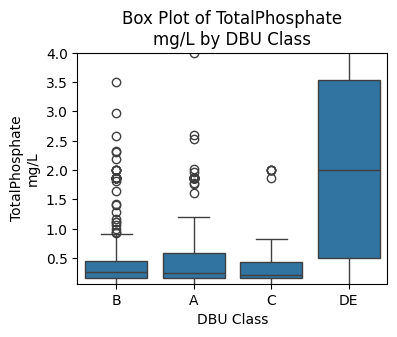

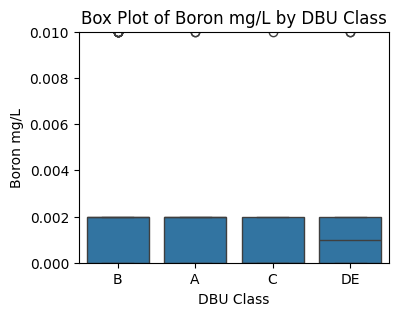

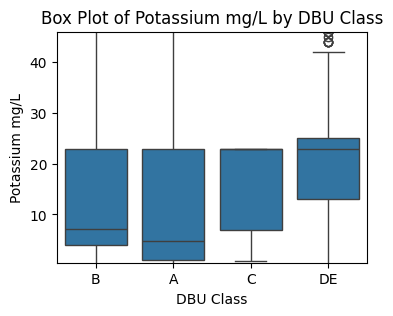

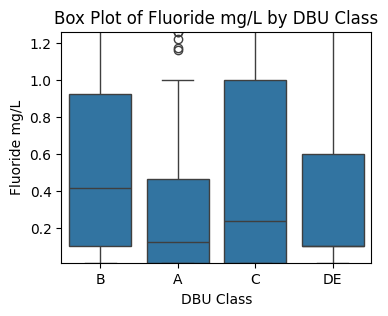

In [16]:
numerical_columns = Xy.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_columns:
    plt.figure(figsize=(4, 3))  
    sns.boxplot(y=Xy[feature], x=Xy['DBU Class'])
    plt.title(f'Box Plot of {feature} by DBU Class')
    
    # Dynamically adjust y-axis limits based on feature range
    lower_limit = Xy[feature].quantile(0.05)
    upper_limit = Xy[feature].quantile(0.95)
    plt.ylim(lower_limit, upper_limit)
    
    plt.show()

In [30]:
columns_to_drop = [
    "Total Fixed Solids\nmg/L",
    "Chloride mg/L",
    "Hardness as CaCO3 mg/L",
    "Calcium as Ca++ mg/L",
    "Total Dissolved\nSolids mg/L",
    "Fecal Coliform MPN/100ml"
]
Xy_red01 = Xy.drop(columns=columns_to_drop)
Xy_red01.info()
Xy_red01.to_csv('Data/output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1403 entries, 0 to 1412
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   D.O. mg/L                       1403 non-null   float64
 1   pH                              1403 non-null   float64
 2   Conductivity m mhos/cm          1403 non-null   float64
 3   BOD at 27C mg/L                 1403 non-null   float64
 4   Nitrate mg/L                    1403 non-null   float64
 5   Nitrite mg/L                    1403 non-null   float64
 6   Total Coliform MPN/100ml        1403 non-null   float64
 7   Turbidity NTU                   1403 non-null   float64
 8   Phenophthaline Alkalinity mg/L  1403 non-null   float64
 9   Total Alkalinity mg/L           1403 non-null   float64
 10  COD mg/L                        1403 non-null   float64
 11  Total Kjeldahl Nitrogen mg/L    1403 non-null   float64
 12  Ammonia-N as N mg/L             1403 no

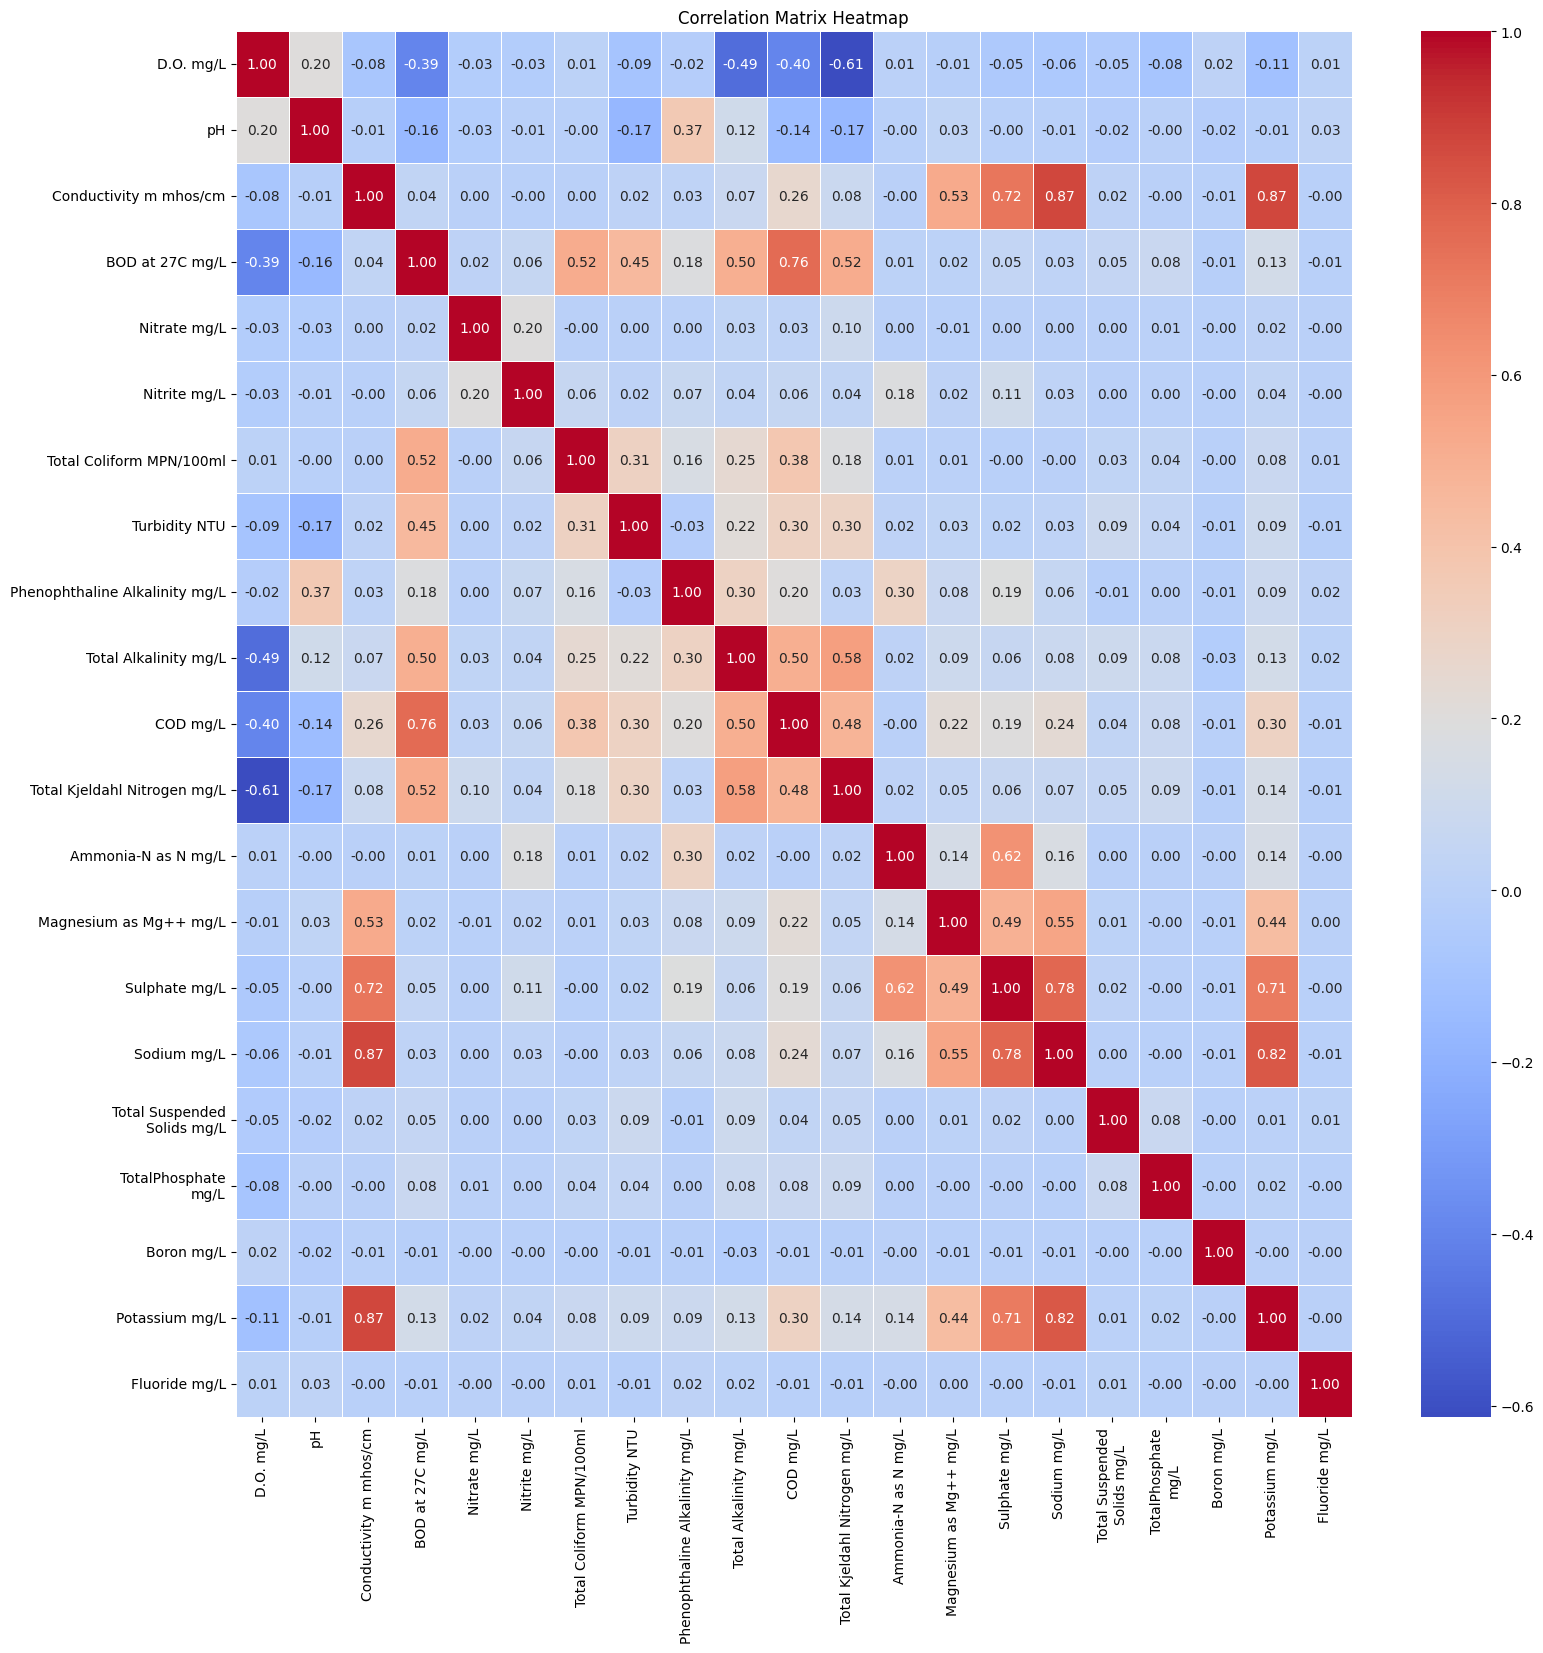

In [31]:
corr_matr = Xy_red01.iloc[:, :-1].corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()